## PART 1 - Extract timestamps

In [1]:
import cv2
import numpy as np
import pytesseract
from datetime import datetime
import os

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def extract_timestamp(image_path):
    """
    Extract timestamp from upper right corner of an image
    """
    # Read the image
    img = cv2.imread(image_path)
    
    if img is None:
        return "Error: Could not read image"
    
    # Get image dimensions
    height, width = img.shape[:2]
    
    # Define the region of interest (ROI) - upper right corner
    # Adjust these values based on your images
    roi_width = int(width * 0.19)  # 25% of image width
    roi_height = int(height * 0.06)  # 5% of image height
    roi_x = width - roi_width
    roi_y = 0
    
    # Extract the ROI
    roi = img[roi_y:roi_y+roi_height, roi_x:roi_x+width]
    
    # Convert to grayscale
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to improve OCR accuracy for white text on black background
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    
    # Invert if needed (black text on white background works better with Tesseract)
    thresh = cv2.bitwise_not(thresh)
    
    # Apply dilation to make text thicker
    kernel = np.ones((2, 2), np.uint8)
    dilated = cv2.dilate(thresh, kernel, iterations=1)
    
    # Apply OCR using Tesseract
    # Configure Tesseract for digits and specific characters
    custom_config = r'--oem 3 --psm 7 -c tessedit_char_whitelist=0123456789-:.'
    text = pytesseract.image_to_string(dilated, config=custom_config).strip()
    
    # Display extracted region for debugging
    # cv2.imshow("Timestamp Region", thresh)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    
    return text


def format_timestamp(timestamp_text):
    """
    Format the extracted timestamp text into a standard datetime format
    """

    try:

        year = 2025
        month = 5
        day = int(timestamp_text.split('-')[0])
        hour = int(timestamp_text.split('-')[2][4:].strip(':').strip('-').strip('.').strip(',').strip(';'))
        minute = 30
        # second = 0
        return datetime(year, month, day, hour, minute).strftime("%Y-%m-%d %H:%M:%S")
    except:
        return 'Timestamp read incorrectly'

def process_directory(directory_path):
    """
    Process all images in a directory and extract timestamps
    """
    results = []
    
    for filename in os.listdir(directory_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(directory_path, filename)
            timestamp_text = extract_timestamp(file_path)
            timestamp = format_timestamp(timestamp_text)
            results.append((filename, timestamp))
            print(f"File: {filename}, Timestamp: {timestamp}")
    
    return results

In [3]:
st = ':15.'
st.strip(':').strip('-').strip('.').strip(',').strip(';')

'15'

In [4]:
# For a single image
# image_path = "data/ml_project_2/Camera 2/20250528003938.jpg" # 20250528003806  # 20250528003540 # Replace with your image path
# timestamp_text = extract_timestamp(image_path)
# print(f"Extracted timestamp text: {timestamp_text}")

# formatted_timestamp = format_timestamp(timestamp_text)
# print(f"Formatted timestamp: {formatted_timestamp}")

# For processing a directory of images
results_dir = {}
for i in range(4):
    print(f'--------PROCESSING FOLDER {i+1}---------')
    dir = f'data/ml_project_2/Camera {i+1}'
    results = process_directory(dir)
    results_dir[dir] = results
    

--------PROCESSING FOLDER 1---------
File: 20250527212620.jpg, Timestamp: 2025-05-07 09:30:00
File: 20250527212624.jpg, Timestamp: 2025-05-07 10:30:00
File: 20250527212629.jpg, Timestamp: Timestamp read incorrectly
File: 20250527212634.jpg, Timestamp: 2025-05-07 12:30:00
File: 20250527212639.jpg, Timestamp: 2025-05-07 13:30:00
File: 20250527212643.jpg, Timestamp: 2025-05-07 14:30:00
File: 20250527212647.jpg, Timestamp: 2025-05-07 15:30:00
File: 20250527212651.jpg, Timestamp: 2025-05-07 16:30:00
File: 20250527212654.jpg, Timestamp: 2025-05-07 17:30:00
File: 20250527212658.jpg, Timestamp: 2025-05-07 18:30:00
File: 20250527212726.jpg, Timestamp: Timestamp read incorrectly
File: 20250527212731.jpg, Timestamp: Timestamp read incorrectly
File: 20250527212735.jpg, Timestamp: Timestamp read incorrectly
File: 20250527212739.jpg, Timestamp: Timestamp read incorrectly
File: 20250527212745.jpg, Timestamp: Timestamp read incorrectly
File: 20250527212749.jpg, Timestamp: Timestamp read incorrectly
Fi

In [ ]:
# SAVING AS JSON FILE

# import json
# with open('image_timestamps.json', "w") as f:
#     json.dump(results_dir, f)

## PART 2 - green coverage % extraction

Simple mask

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def green_mask_perc(filename):
    # Load the image
    img = cv2.imread(filename)

    # Convert from BGR (OpenCV default) to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to HSV color space (better for color filtering)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    # Define green color range in HSV
    # You may need to adjust these values based on your specific lighting conditions
    lower_green = np.array([20, 35, 30])  # Lower threshold for green
    upper_green = np.array([95, 255, 255])  # Upper threshold for green
    # lower_green = np.array([35, 70, 70])  # Higher saturation and value thresholds
    # upper_green = np.array([85, 255, 255])


    # Create a mask for green pixels
    green_mask = cv2.inRange(img_hsv, lower_green, upper_green)

    # Calculate green coverage percentage
    total_pixels = green_mask.size
    green_pixels = cv2.countNonZero(green_mask)
    green_percentage = (green_pixels / total_pixels) * 100

    return green_percentage, img_rgb, green_mask

# Display results
location = 'data/ml_project_2/Camera 1/20250527212726.jpg'  #20250528002733  20250527212654  20250527212658 20250527212726
green_percentage, img_rgb, green_mask = green_mask_perc(location)
print(f"Green coverage: {green_percentage:.2f}%")


Green coverage: 11.46%


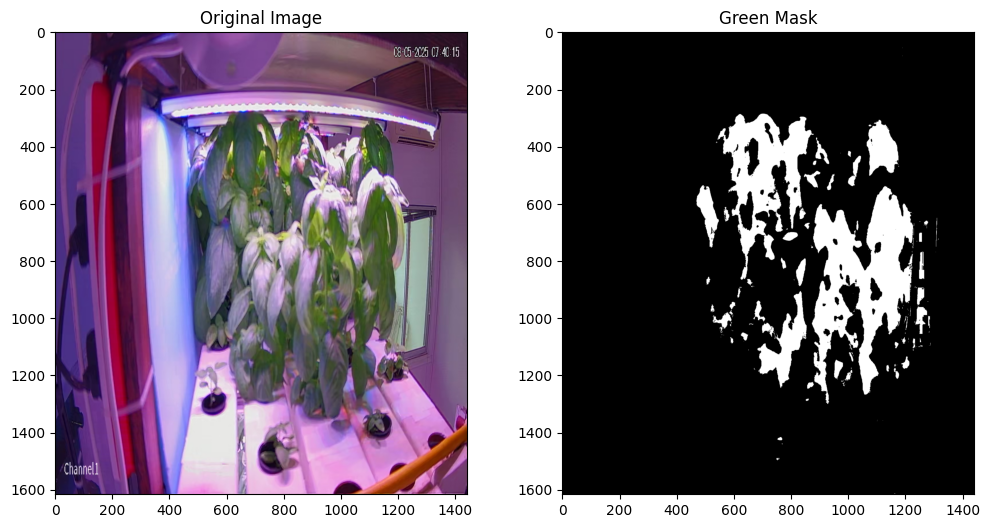

In [16]:
# Visualize the mask
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(green_mask, cmap='gray')
plt.title('Green Mask')
plt.show()

Function to run the mask in a loop for each and every image in a folder

In [20]:
import os
def process_directory_green_perc(directory_path):
    """
    Process all images in a directory and extract timestamps
    """
    results = []
    
    for filename in os.listdir(directory_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(directory_path, filename)
            green_percentage, _, _ = green_mask_perc(file_path)
            
            results.append((filename, green_percentage))
            print(f"File: {filename}, Green %: {green_percentage}")
    
    return results

In [21]:
# For processing a directory of images
results_dir = {}
for i in range(4):
    print(f'--------PROCESSING FOLDER {i+1}---------')
    dir = f'data/ml_project_2/Camera {i+1}'
    results = process_directory_green_perc(dir)
    results_dir[dir] = results

# SAVING AS JSON FILE

import json
with open('image_green_coverage.json', "w") as f:
    json.dump(results_dir, f)

--------PROCESSING FOLDER 1---------
File: 20250527212620.jpg, Green %: 9.658278327832784
File: 20250527212624.jpg, Green %: 11.909894114411442
File: 20250527212629.jpg, Green %: 9.844136757425742
File: 20250527212634.jpg, Green %: 11.372945888338833
File: 20250527212639.jpg, Green %: 13.941358979647964
File: 20250527212643.jpg, Green %: 14.95758560231023
File: 20250527212647.jpg, Green %: 20.816144114411443
File: 20250527212651.jpg, Green %: 20.080187706270628
File: 20250527212654.jpg, Green %: 7.996897345984598
File: 20250527212658.jpg, Green %: 9.118966584158414
File: 20250527212726.jpg, Green %: 11.461642257975797
File: 20250527212731.jpg, Green %: 12.751220434543454
File: 20250527212735.jpg, Green %: 13.014215484048405
File: 20250527212739.jpg, Green %: 11.789999312431243
File: 20250527212745.jpg, Green %: 11.783295517051705
File: 20250527212749.jpg, Green %: 12.730163641364136
File: 20250527212753.jpg, Green %: 12.629735629812982
File: 20250527212756.jpg, Green %: 13.472179249174

Excess Green Index

Green coverage: 8.11%


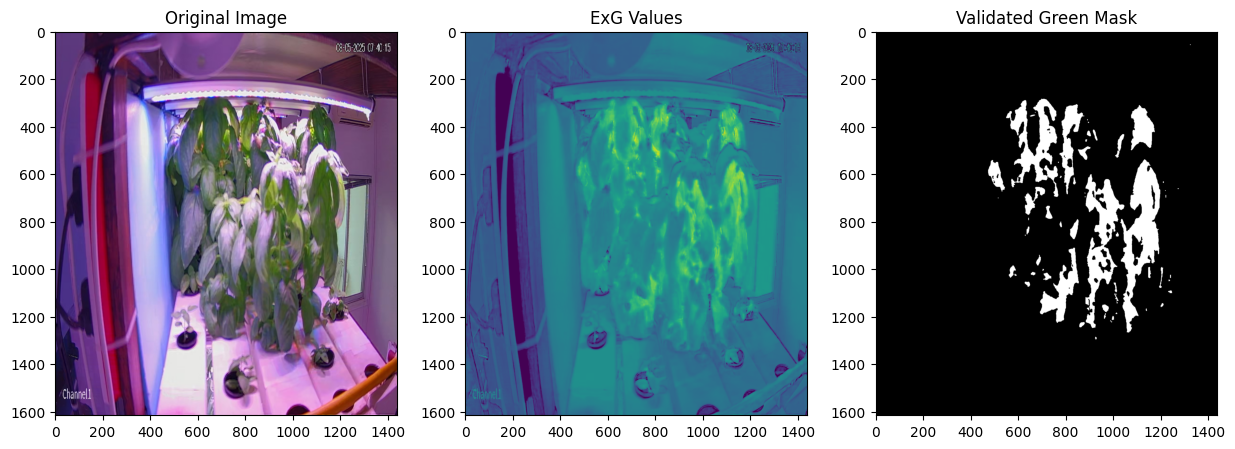

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def exg_with_color_validation(image_path, exg_threshold=20):
    # Load image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Convert to float for calculations
    img_float = img_rgb.astype(float)
    
    # Extract channels
    r = img_float[:,:,0]
    g = img_float[:,:,1]
    b = img_float[:,:,2]
    
    # Calculate ExG
    total = r + g + b
    total[total == 0] = 1  # Avoid division by zero
    
    r_norm = r / total
    g_norm = g / total
    b_norm = b / total
    
    exg = 2 * g_norm - r_norm - b_norm
    exg_scaled = ((exg + 1) * 127.5).astype(np.uint8)
    
    # Initial ExG mask
    _, initial_mask = cv2.threshold(exg_scaled, exg_threshold, 255, cv2.THRESH_BINARY)
    
    # Create an additional validation mask based on absolute RGB values
    # Real green plants typically have G > R and G > B
    green_dominant = np.logical_and(g > r*1.1, g > b*1.1).astype(np.uint8) * 255
    
    # For LED grow environments, also check for unnaturally high blue or red values
    # (characteristic of purple LED lighting)
    unnatural_light = np.logical_and(b > 150, r > 150).astype(np.uint8) * 255
    
    # Combine masks - pixels must be identified by ExG AND have green as dominant color
    # AND not be in areas with unnatural lighting
    combined_mask = cv2.bitwise_and(initial_mask, green_dominant)
    combined_mask = cv2.bitwise_and(combined_mask, cv2.bitwise_not(unnatural_light))
    
    # Apply morphological operations
    kernel = np.ones((3, 3), np.uint8)
    final_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_OPEN, kernel)
    final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_CLOSE, kernel)
    
    # Calculate coverage
    total_pixels = final_mask.size
    green_pixels = cv2.countNonZero(final_mask)
    green_percentage = (green_pixels / total_pixels) * 100
    
    return img_rgb, exg_scaled, final_mask, green_percentage


# Usage
img_rgb, exg_img, green_mask, green_percentage = exg_with_color_validation('data/ml_project_2/Camera 1/20250527212726.jpg')
print(f"Green coverage: {green_percentage:.2f}%")

# Display
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(exg_img, cmap='viridis')
plt.title('ExG Values')
plt.subplot(1, 3, 3)
plt.imshow(green_mask, cmap='gray')
plt.title('Validated Green Mask')
plt.show()

## PART 3 - stiching the two found values together

In [1]:
import json

# Load the two JSON files
with open('image_green_coverage.json', 'r') as f:
    green_coverage_data = json.load(f)

with open('image_timestamps.json', 'r') as f:
    timestamp_data = json.load(f)

# Create a new dictionary to store the merged data
merged_data = {}

# Process each key that exists in both files
for key in green_coverage_data:
    if key in timestamp_data:
        # Create dictionaries to look up values by image_name
        green_dict = {pair[0]: pair[1] for pair in green_coverage_data[key]}
        time_dict = {pair[0]: pair[1] for pair in timestamp_data[key]}
        
        # Find common image names
        common_images = set(green_dict.keys()) & set(time_dict.keys())
        
        # Create the list of tuples for this key
        merged_list = [(img, time_dict[img], green_dict[img]) 
                       for img in common_images]
        
        # Store in the merged data dictionary
        merged_data[key] = merged_list

# Save the merged data to a new JSON file
with open('merged_data.json', 'w') as f:
    json.dump(merged_data, f, indent=2)

print("Merge complete. Data saved to 'merged_data.json'")

Merge complete. Data saved to 'merged_data.json'


Now it's time to combine the data per timestamp from Solar Panels (camera 1 & 4) and Grid (camera 2 & 3) - since NG and PV sensor data is already aggregated on timestamp level as mean. 

In [2]:
camera1_key = "data/ml_project_2/Camera 1"
camera4_key = "data/ml_project_2/Camera 4"

camera1_dict = {}
camera4_dict = {}

# Extract data for Camera 1
if camera1_key in merged_data:
    for item in merged_data[camera1_key]:
        # item is (image_name, timestamp, green_coverage)
        timestamp = item[1]
        green_coverage = item[2]
        camera1_dict[timestamp] = green_coverage

# Extract data for Camera 4
if camera4_key in merged_data:
    for item in merged_data[camera4_key]:
        timestamp = item[1]
        green_coverage = item[2]
        camera4_dict[timestamp] = green_coverage

In [ ]:
camera4_dict

{'Timestamp read incorrectly': 5.218260107260726,
 '2025-05-13 17:30:00': 4.980490236523653,
 '2025-05-14 10:30:00': 0.8084089658965896,
 '2025-05-06 19:30:00': 16.184895833333332,
 '2025-05-13 14:30:00': 4.092452213971398,
 '2025-05-07 17:30:00': 2.1796359323432344,
 '2025-05-11 10:30:00': 1.143813600110011,
 '2025-05-19 19:30:00': 3.1789311743674364,
 '2025-05-19 10:30:00': 2.626426705170517,
 '2025-05-19 18:30:00': 1.9046084295929595,
 '2025-05-12 14:30:00': 1.186528809130913,
 '2025-05-05 04:30:00': 7.768882356985698,
 '2025-05-02 05:30:00': 40.34558924642464,
 '2025-05-14 11:30:00': 0.9729527640264026,
 '2025-05-01 18:30:00': 3.4803441281628165,
 '2025-05-17 17:30:00': 8.0332525440044,
 '2025-05-14 05:30:00': 35.72061503025303,
 '2025-05-21 05:30:00': 38.366594471947195,
 '2025-05-07 12:30:00': 0.8501787678767877,
 '2025-05-19 12:30:00': 2.913357742024202,
 '2025-05-13 05:30:00': 39.66236076732673,
 '2025-05-21 18:30:00': 3.841188806380638,
 '2025-05-15 11:30:00': 11.2835619499449

In [9]:
camera1_keys = [key for key in camera1_dict.keys() if key != 'Timestamp read incorrectly']
camera4_keys = [key for key in camera4_dict.keys() if key != 'Timestamp read incorrectly']

all_timestamps = set(camera1_keys) | set(camera4_keys)
combined_dict_pv = {}

for timestamp in all_timestamps:
    # Case 1: Timestamp in both dictionaries
    if timestamp in camera1_dict and timestamp in camera4_dict:
        # Average the green coverage values
        combined_dict_pv[timestamp] = (camera1_dict[timestamp] + camera4_dict[timestamp]) / 2.0
    # Case 2: Timestamp only in Camera 1
    elif timestamp in camera1_dict:
        combined_dict_pv[timestamp] = camera1_dict[timestamp]
    # Case 3: Timestamp only in Camera 4
    elif timestamp in camera4_dict:
        combined_dict_pv[timestamp] = camera4_dict[timestamp]

In [10]:
combined_dict_pv

{'2025-05-07 18:30:00': 9.118966584158414,
 '2025-05-17 18:30:00': 4.542938668866887,
 '2025-05-11 17:30:00': 14.95376100110011,
 '2025-05-12 14:30:00': 1.186528809130913,
 '2025-05-21 11:30:00': 20.373306861936193,
 '2025-05-12 10:30:00': 4.980296857810781,
 '2025-05-12 19:30:00': 5.5508070338283835,
 '2025-05-13 16:30:00': 4.375343784378439,
 '2025-05-17 00:30:00': 37.51439597084708,
 '2025-05-01 12:30:00': 9.411312224972496,
 '2025-05-14 13:30:00': 0.7238380088008801,
 '2025-05-21 08:30:00': 8.44059405940594,
 '2025-05-14 12:30:00': 0.8026505775577558,
 '2025-05-19 10:30:00': 6.11328125,
 '2025-05-19 18:30:00': 4.670095915841585,
 '2025-05-02 17:30:00': 4.676241061606161,
 '2025-05-16 11:30:00': 7.611429111661167,
 '2025-05-19 16:30:00': 3.5159687843784377,
 '2025-05-07 04:30:00': 1.2166529152915293,
 '2025-05-16 03:30:00': 35.867110148514854,
 '2025-05-14 10:30:00': 4.968951973322332,
 '2025-05-07 12:30:00': 6.11156232810781,
 '2025-05-22 10:30:00': 9.766613380088009,
 '2025-05-16 

Done for solar panels. Now the grid

In [11]:
camera2_key = "data/ml_project_2/Camera 2"
camera3_key = "data/ml_project_2/Camera 3"

camera2_dict = {}
camera3_dict = {}

# Extract data for Camera 3
if camera2_key in merged_data:
    for item in merged_data[camera2_key]:
        # item is (image_name, timestamp, green_coverage)
        timestamp = item[1]
        green_coverage = item[2]
        camera2_dict[timestamp] = green_coverage

# Extract data for Camera 3
if camera3_key in merged_data:
    for item in merged_data[camera3_key]:
        timestamp = item[1]
        green_coverage = item[2]
        camera3_dict[timestamp] = green_coverage

# ++++++++++++++++++++++++++++++++++
camera2_keys = [key for key in camera2_dict.keys() if key != 'Timestamp read incorrectly']
camera3_keys = [key for key in camera3_dict.keys() if key != 'Timestamp read incorrectly']

all_timestamps = set(camera2_keys) | set(camera3_keys)
combined_dict_ng = {}

for timestamp in all_timestamps:
    # Case 1: Timestamp in both dictionaries
    if timestamp in camera2_dict and timestamp in camera3_dict:
        # Average the green coverage values
        combined_dict_ng[timestamp] = (camera2_dict[timestamp] + camera3_dict[timestamp]) / 2.0
    # Case 2: Timestamp only in Camera 1
    elif timestamp in camera2_dict:
        combined_dict_ng[timestamp] = camera2_dict[timestamp]
    # Case 3: Timestamp only in Camera 4
    elif timestamp in camera3_dict:
        combined_dict_ng[timestamp] = camera3_dict[timestamp]

In [16]:
import pandas as pd
pv_green_df = pd.DataFrame({'Timestamp': combined_dict_pv.keys(), 'green_cvg': combined_dict_pv.values()})
ng_green_df = pd.DataFrame({'Timestamp': combined_dict_ng.keys(), 'green_cvg': combined_dict_ng.values()})

In [20]:
pv_green_df.to_csv('data/ml_project_2/pv_green_cvg.csv', index=False)
ng_green_df.to_csv('data/ml_project_2/ng_green_cvg.csv', index=False) 